# Непрерывная оптимизация, ФКН ВШЭ

## Семинар 5

### О семинаре

<b>Первая часть</b> задания посвящена реализации метода сопряженных градиентов для решения СЛАУ.

<b>Вторая часть</b> задания посвящена реализации метода сопряженных градиентов с предобуславливанием для решения СЛАУ.

In [1]:
import sys
assert sys.version_info[0] == 3, "Use Python 3"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import time

%matplotlib inline

## Часть 1: Метод сопряженных градиентов

Решаемая задача: $$Ax = b,\ A = A^T,\ A \succ 0$$

<img src="cg.jpg" width="40%">

**Важно:** в качестве критерия останова используйте $\|r_k\| < \varepsilon \|b\|$

### Задача 1

Реализуйте метод сопряженных градиентов

In [3]:
def conjugate_gradients(matvec, b, x_0, tolerance=1e-4, max_iter=None, trace=False, display=False):
    """
    Solves system Ax=b using Conjugate Gradients method.

    Parameters
    ----------
    matvec : function
        Implement matrix-vector product of matrix A and arbitrary vector x
    b : 1-dimensional np.array
        Vector b for the system.
    x_0 : 1-dimensional np.array
        Starting point of the algorithm
    tolerance : float
        Epsilon value for stopping criterion.
        Stop optimization procedure and return x_k when:
         ||Ax_k - b||_2 <= tolerance * ||b||_2
    max_iter : int, or None
        Maximum number of iterations. if max_iter=None, set max_iter to n, where n is
        the dimension of the space
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display:  bool
        If True, debug information is displayed during optimization.
        Printing format is up to a student and is not checked in any way.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        'success' or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time in seconds passed from the start of the method
            - history['residual_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    # Your code here
    return x_k, msg, history

### Задача 2:

Постройте график зависимости количества итераций метод сопряженных градиентов от числа обусловленности матрицы.

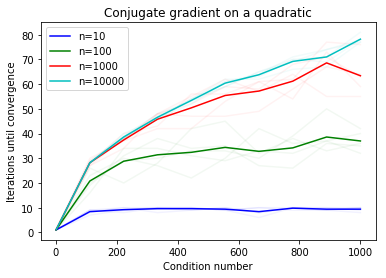

In [9]:
# Your code here

![](./gd_cond.jpg)

## Часть 2: Метод сопряженных градиентов с предобуславливанием

В методе сопряженных градиентов появляется матрица-*предобуславливатель* $M$. Теперь формулы для метода выглядят следующим образом: 

<img src="pcg.jpg" width="40%">

**Важно:** на самом деле при предобуславливании нам нужна не сколько матрица $M$, сколько её обратная матрица $M^{-1}$. Более того, нам достаточно уметь вычислять $M^{-1} x$ для любого вектора. Поэтому обычно в качестве предобуславливателя $M$ берут матрицы достаточно простой структуры, например, диагональные

**Важно:** в качестве критерия останова используйте $\|r_k\| < \varepsilon \|b\|$

### Задача 3

Реализуйте метод градиентного спуска с предобуславливанием

In [10]:
def preconditioned_conjugate_gradients(matvec, b, x_0,
                                       precondition_solver=lambda x: x,
                                       tolerance=1e-4, max_iter=None, trace=False, display=False):
    """
    Solves system Ax=b using Conjugate Gradients method.

    Parameters
    ----------
    matvec : function
        Implement matrix-vector product of matrix A and arbitrary vector x
    b : 1-dimensional np.array
        Vector b for the system.
    x_0 : 1-dimensional np.array
        Starting point of the algorithm
    tolerance : float
        Epsilon value for stopping criterion.
        Stop optimization procedure and return x_k when:
         ||Ax_k - b||_2 <= tolerance * ||b||_2
    max_iter : int, or None
        Maximum number of iterations. if max_iter=None, set max_iter to n, where n is
        the dimension of the space
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display:  bool
        If True, debug information is displayed during optimization.
        Printing format is up to a student and is not checked in any way.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        'success' or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time in seconds passed from the start of the method
            - history['residual_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    # Your code here
    return x_k, message, history

### Задача 4

Для данной задачи сравните работу метода сопряженных градиентов с и без предобуславливания. В качестве предобуславливателя возьмите $M = Diag(A)$.

In [11]:
def construct_precond_task(n):
    indices = np.arange(n) + 1
    A = np.diag(1 + np.sqrt(indices))
    idx_diffs = np.abs(indices - indices.reshape(-1, 1))
    A[idx_diffs == 1] = 1
    A[idx_diffs == 100] = 1
    b = np.ones(n)
    return A, b

In [12]:
A, b = construct_precond_task(500)

In [13]:
def matvec(x):
    # Your code here

def precond_solver(x):
    # Your code here

x_0 = np.zeros_like(b)
x_k_cg, message_cg, hist_cg = conjugate_gradients(
    matvec, b, x_0,
    tolerance=1e-8, trace=True,
)
x_k_pcg, message_pcg, hist_pcg = preconditioned_conjugate_gradients(
    matvec, b, x_0,
    precondition_solver=precond_solver,
    tolerance=1e-8, trace=True,
)

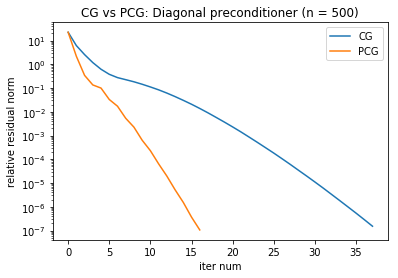

In [14]:
# Your code here

### Задача 5

Постройте график зависимости количества итераций метод сопряженных градиентов с диагональным предобуславливателем от числа обусловленности матрицы.

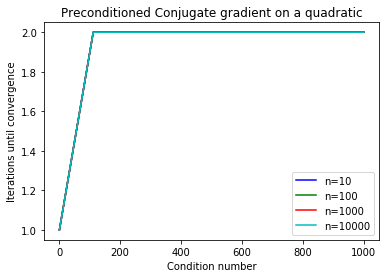

In [19]:
# Your code here